In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Matplotlib is building the font cache; this may take a moment.


In [2]:
print(torch.__version__)

2.0.1


In [3]:
# Load the MNIST dataset
# Define a transformation to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



4.0%

100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



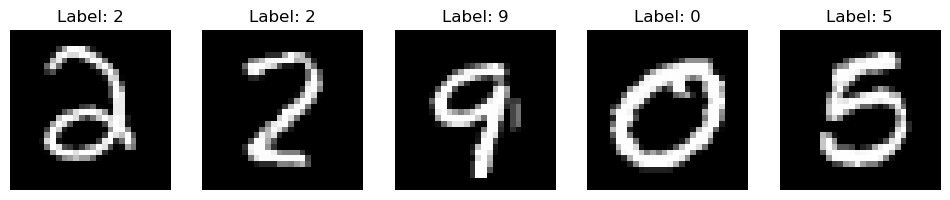

In [4]:
import matplotlib.pyplot as plt

# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Plot the first few images in the batch
fig, axes = plt.subplots(1, 5, figsize=(12, 5))
for i in range(5):
    ax = axes[i]
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')
plt.show()


In [5]:
print(f"Number of training samples: {len(trainset)}")
print(f"Number of test samples: {len(testset)}")

Number of training samples: 60000
Number of test samples: 10000


In [6]:
# Get a sample from the training set
sample = trainset[0]
image, label = sample

print(f"Image shape: {image.shape}")
print(f"Label: {label}")

Image shape: torch.Size([1, 28, 28])
Label: 5


In [7]:
# Now we define our classifier
class SimpleNN(nn.Module):
    
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define the layers as class attributes
        self.fc1 = nn.Linear(28*28, 128) # MNIST Images are 28x28
        self.fc2 = nn.Linear(128, 64) # 128 input, 64 output
        self.fc3 = nn.Linear(64, 10)  # 10 classes for MNIST
        
        
        
        
    def forward(self, x):
        x = x.view(-1, 28*28) # Flatten the image
        x = torch.relu(self.fc1(x)) # Pass through the first layer and apply ReLU
        x = torch.relu(self.fc2(x)) # Pass through the second layer and apply ReLU
        x = self.fc3(x) # Pass through the third layer no activation
        return x


# Create an instance of the model
model = SimpleNN()  

In [8]:
# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
# Now we train the model
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader)}')

Epoch 1/5, Loss: 1.0293390006462395
Epoch 2/5, Loss: 0.38618007958380146
Epoch 3/5, Loss: 0.32566821256648504
Epoch 4/5, Loss: 0.29250200561432443
Epoch 5/5, Loss: 0.2662186285913753


In [10]:
# Here we evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')


Accuracy of the network on the 10000 test images: 92.99%


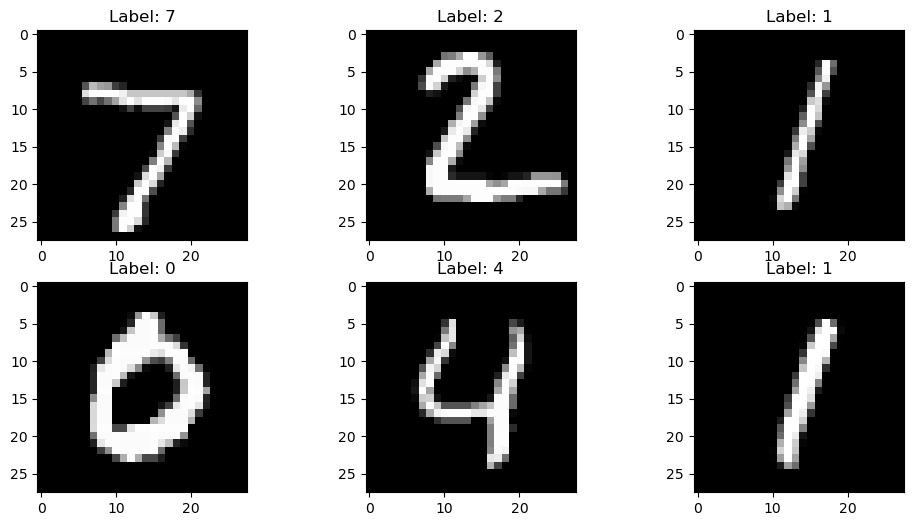

In [11]:
# Plotting some test images with predictions
# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images
plt.figure(figsize=(12, 6))
for idx in range(6):
    plt.subplot(2, 3, idx + 1)
    plt.imshow(images[idx].numpy().squeeze(), cmap='gray')
    plt.title(f'Label: {labels[idx].item()}')
plt.show()
